In [1]:
import cv2
import sys
sys.path.insert(0, '..')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from flow_utils import read_flow, flow_to_image, bilinear_warp
from data_loader import tf_image_flip_lr, tf_image_flip_ud, tf_image_scale_and_crop

In [2]:
im1 = cv2.imread('../sample_images/00003_img1.ppm')
im2 = cv2.imread('../sample_images/00003_img2.ppm')
flo = read_flow('../sample_images/00003_flow.flo')

flo_im = flow_to_image(flo)

Text(0.5, 1.0, 'Original inputs:')

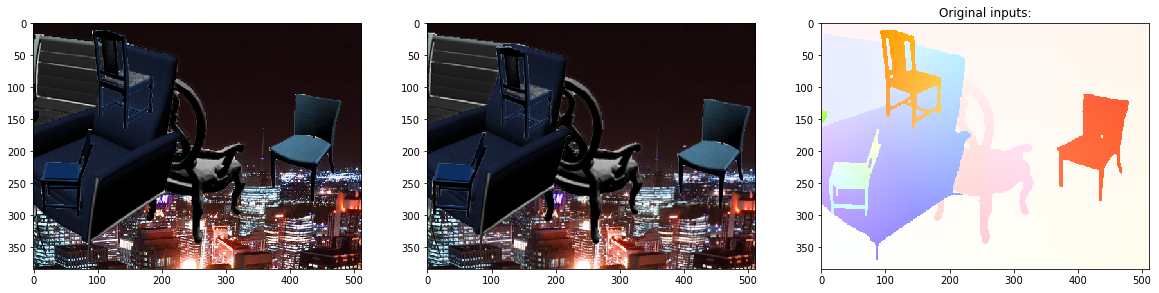

In [3]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(im1)
plt.subplot(1, 3, 2)
plt.imshow(im2)
plt.subplot(1, 3, 3)
plt.imshow(flo_im)

plt.title('Original inputs:')

## Test 'tf_image_flip_ud' & tf_image_flip_lr'

In [4]:
flow_color_table = cv2.imread('flow_color_table.jpg')
flow_color_table = cv2.rotate(flow_color_table, cv2.ROTATE_90_CLOCKWISE)

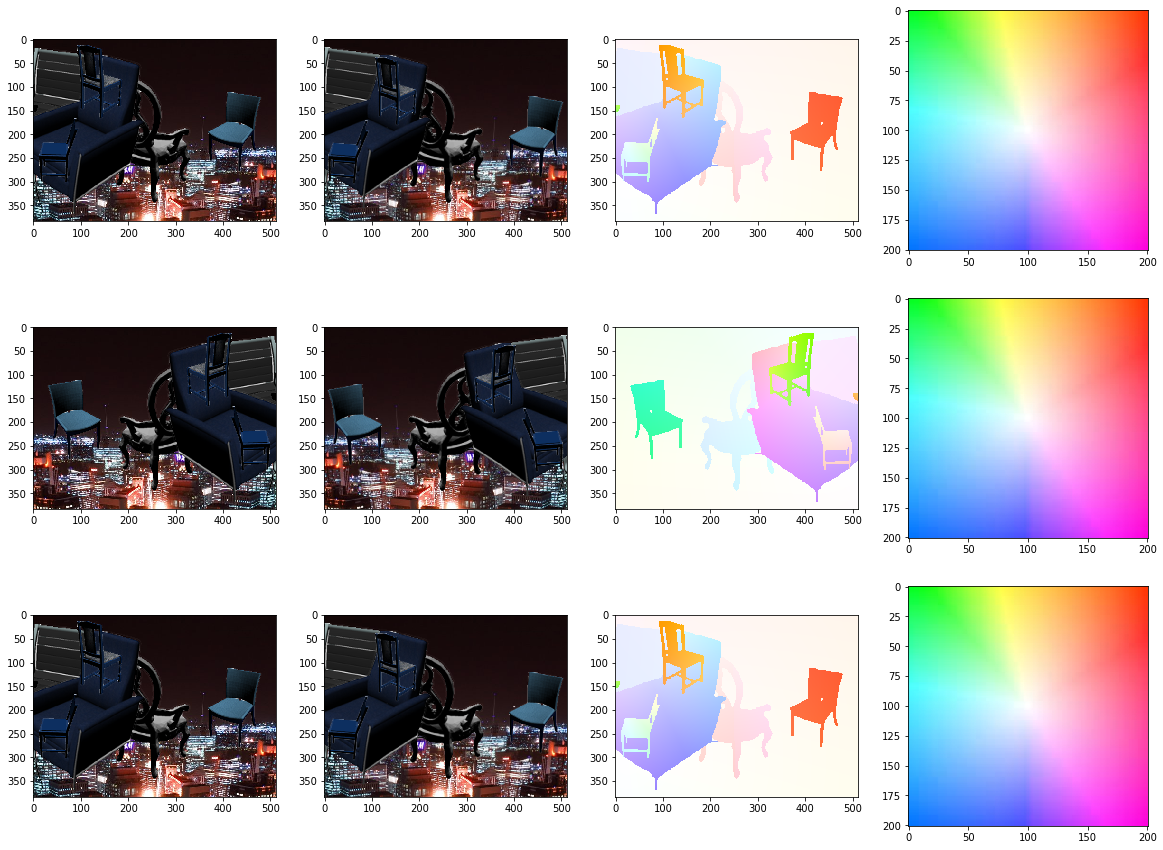

In [5]:
n_times = 3

plt.figure(figsize=(20, 15))
for i in range(n_times):
    im1, im2, flo = tf_image_flip_lr(im1, im2, flo)
    
    flo_im = flow_to_image(flo.numpy())
    
    plt.subplot(n_times, 4, i*4+1)
    plt.imshow(im1)
    plt.subplot(n_times, 4, i*4+2)
    plt.imshow(im2)
    plt.subplot(n_times, 4, i*4+3)
    plt.imshow(flo_im)
    plt.subplot(n_times, 4, i*4+4)
    plt.imshow(flow_color_table)

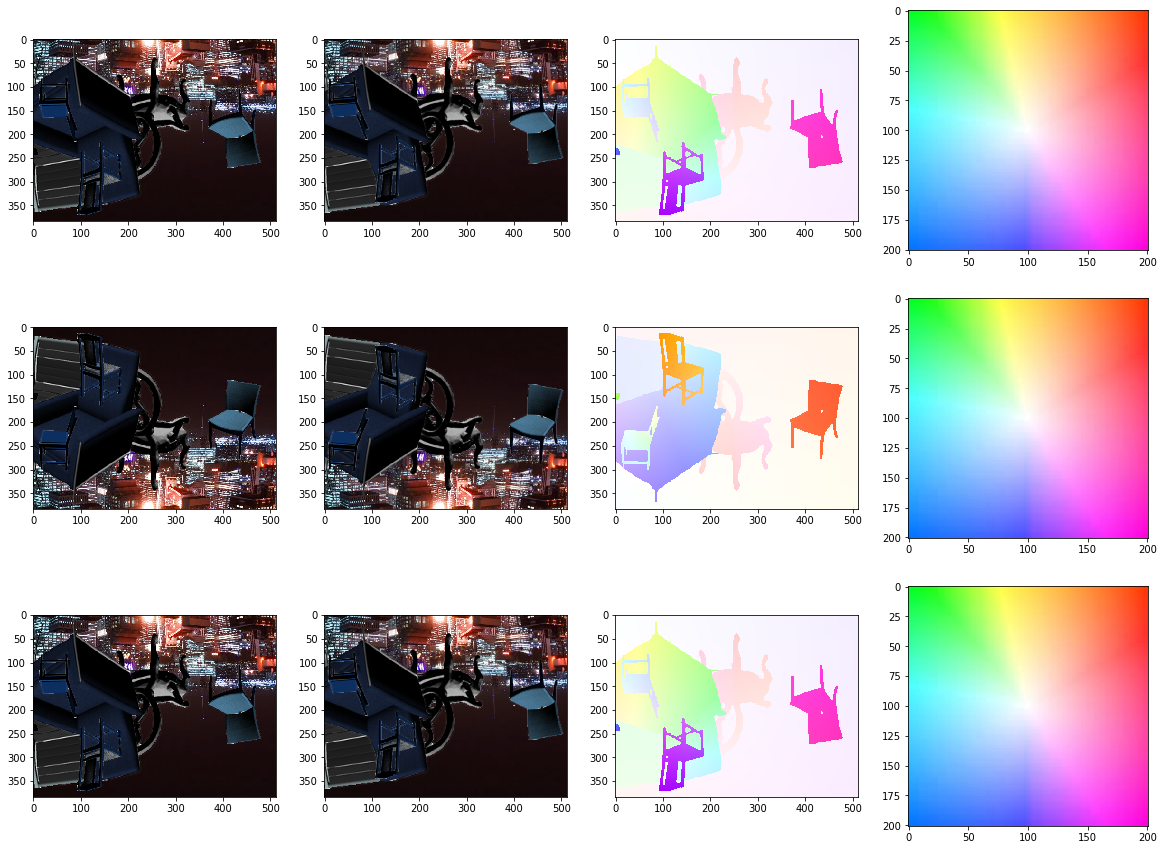

In [6]:
n_times = 3

plt.figure(figsize=(20, 15))
for i in range(n_times):
    im1, im2, flo = tf_image_flip_ud(im1, im2, flo)
    
    flo_im = flow_to_image(flo.numpy())
    
    plt.subplot(n_times, 4, i*4+1)
    plt.imshow(im1)
    plt.subplot(n_times, 4, i*4+2)
    plt.imshow(im2)
    plt.subplot(n_times, 4, i*4+3)
    plt.imshow(flo_im)
    plt.subplot(n_times, 4, i*4+4)
    plt.imshow(flow_color_table)

## Test 'tf_image_scale_and_crop'

In [7]:
class Flags(object):
    def __init__(self, crop_size, dataset='mixed'):
        self.crop_size = crop_size
        self.dataset = dataset

flags = Flags(crop_size=[256, 448])

In [8]:
_FLYINGCHAIRS = 0
_FLYINGTHINGS3D = 1

In [9]:
im1 = tf.cast(im1, tf.float32) / 255.0
im2 = tf.cast(im2, tf.float32) / 255.0

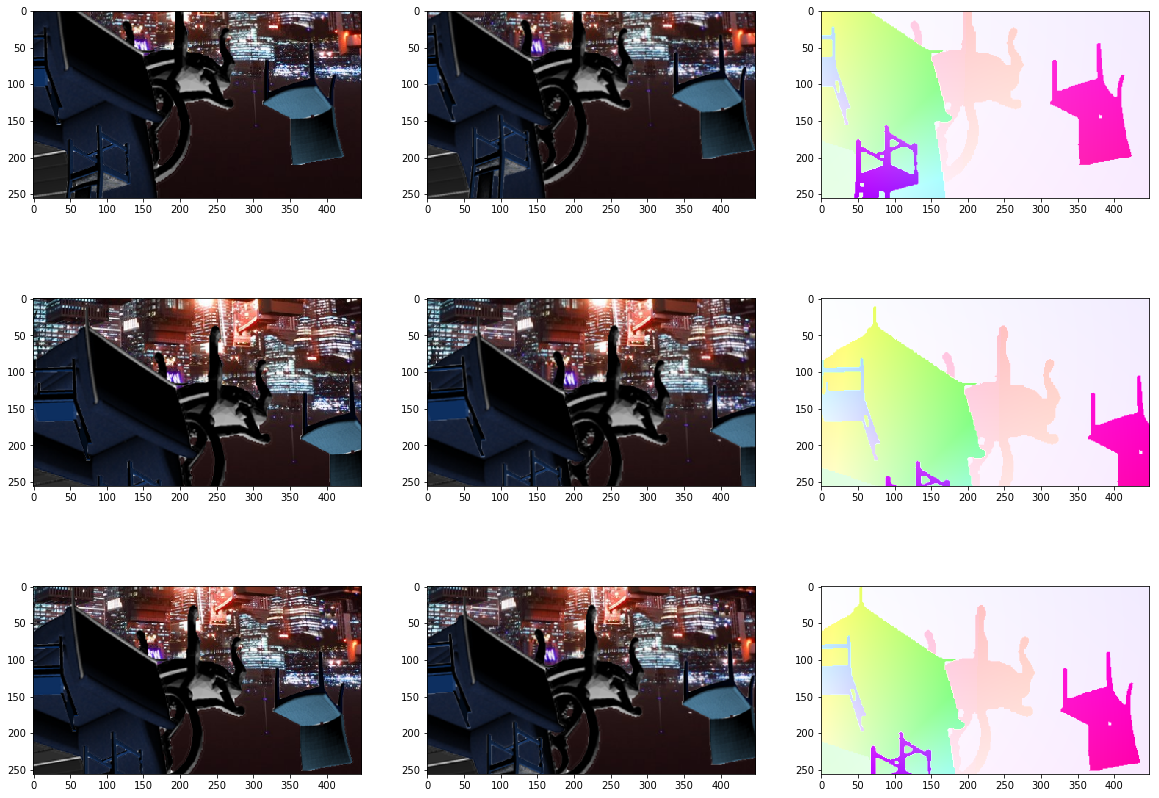

In [10]:
n_times = 3

plt.figure(figsize=(20, 15))
for i in range(n_times):
    _im1, _im2, _flo = tf_image_scale_and_crop(im1, im2, flo, mode=_FLYINGCHAIRS, flags=flags)
    
    flo_im = flow_to_image(_flo.numpy())
    
    plt.subplot(n_times, 3, i*3+1)
    plt.imshow(_im1.numpy())
    plt.subplot(n_times, 3, i*3+2)
    plt.imshow(_im2.numpy())
    plt.subplot(n_times, 3, i*3+3)
    plt.imshow(flo_im)

## Test warping function

In [11]:
im2_batched = tf.expand_dims(im2, axis=0)
flo_batched = tf.expand_dims(flo, axis=0)

im1_warped = bilinear_warp(im2_batched, flo_batched)
im1_warped = im1_warped.numpy()[0]

In [12]:
flo_im = flow_to_image(flo.numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


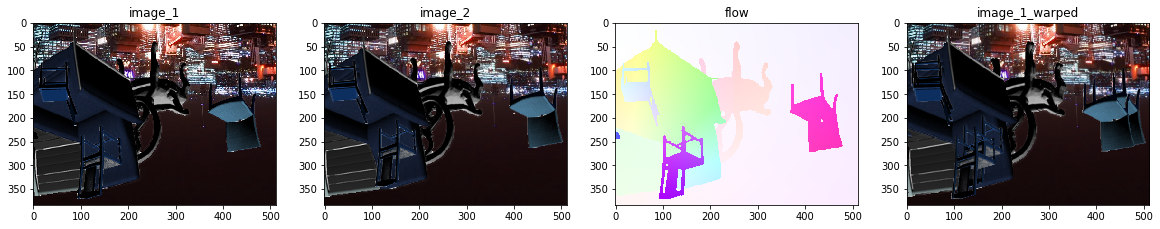

In [13]:
plt.figure(figsize=(20, 15))

plt.subplot(1, 4, 1).set_title('image_1')
plt.imshow(im1)
plt.subplot(1, 4, 2).set_title('image_2')
plt.imshow(im2)
plt.subplot(1, 4, 3).set_title('flow')
plt.imshow(flo_im)
plt.subplot(1, 4, 4).set_title('image_1_warped')
plt.imshow(im1_warped)